In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import datetime
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

In [2]:
df_d_p = pd.read_csv('depression_threads.csv')
df_s_p = pd.read_csv('suicidewatch_threads.csv')

df_d_p = df_d_p.drop('Unnamed: 0', axis = 1)
df_s_p = df_s_p.drop('Unnamed: 0', axis = 1)

print(df_d_p.shape)
print(df_s_p.shape)

(934, 31)
(980, 31)


In [3]:
df_d_c = pd.read_csv('depression_comments.csv')
df_s_c = pd.read_csv('suicidewatch_comments.csv')

df_d_c = df_d_c.drop('Unnamed: 0', axis = 1)
df_s_c = df_s_c.drop('Unnamed: 0', axis = 1)

print(df_d_c.shape)
print(df_s_c.shape)

(4035, 41)
(4447, 41)


In [4]:
df_s_c.groupby('Post_Reply')['title'].count()

Post_Reply
N    2227
Y    2220
Name: title, dtype: int64

A post reply is a comment that directly responds to the post, rather than a comment that responds to a comment

### Sentiment Analysis

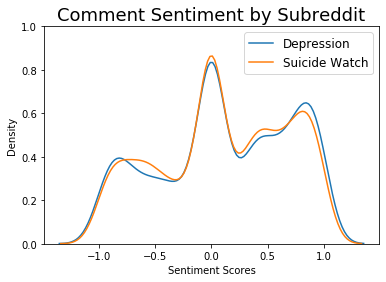

In [47]:
sns.distplot(df_d_c['C_Sent_Com'], hist = False, kde = True, label='Depression')
sns.distplot(df_s_c['C_Sent_Com'], hist = False, kde = True, label='Suicide Watch')
# Plot formatting
plt.legend(prop={'size': 12})
plt.xlabel('Sentiment Scores')
plt.ylabel('Density')
plt.title('Comment Sentiment by Subreddit', fontsize = 18)

plt.ylim(0,1)

plt.savefig('Comment_Sentiment_Comparison.png')

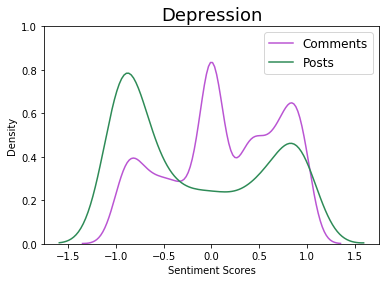

In [44]:
sns.distplot(df_d_c['C_Sent_Com'], hist = False, kde = True, label='Comments', color='mediumorchid')
sns.distplot(df_d_p['P_Sent_Com'], hist = False, kde = True, label='Posts', color='seagreen')
# Plot formatting
plt.legend(prop={'size': 12})
plt.xlabel('Sentiment Scores')
plt.ylabel('Density')
plt.title('Depression', fontsize = 18)

plt.ylim(0, 1)

plt.savefig('Depression_Sentiments.png')

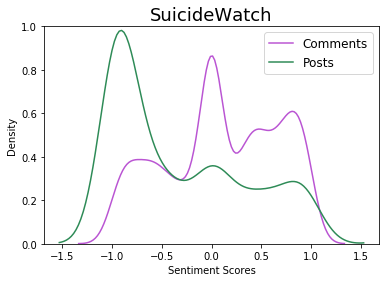

In [43]:
sns.distplot(df_s_c['C_Sent_Com'], hist = False, kde = True, label='Comments', color='mediumorchid')
sns.distplot(df_s_p['P_Sent_Com'], hist = False, kde = True, label='Posts', color='seagreen')
# Plot formatting
plt.legend(prop={'size': 12})
plt.xlabel('Sentiment Scores')
plt.ylabel('Density')
plt.title('SuicideWatch', fontsize = 18)

plt.ylim(0, 1)

plt.savefig('SuicideWatch_Sentiments.png')

In [8]:
df_d_p['P_Sent_Com'].describe()

count    934.000000
mean      -0.170675
std        0.737019
min       -0.996900
25%       -0.887850
50%       -0.401700
75%        0.598625
max        0.999100
Name: P_Sent_Com, dtype: float64

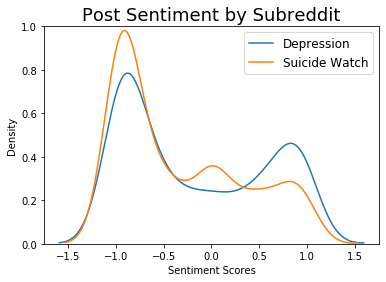

In [45]:
sns.distplot(df_d_p['P_Sent_Com'], hist = False, kde = True, label='Depression')
sns.distplot(df_s_p['P_Sent_Com'], hist = False, kde = True, label='Suicide Watch')
# Plot formatting
plt.legend(prop={'size': 12})
plt.xlabel('Sentiment Scores')
plt.ylabel('Density')  
plt.title('Post Sentiment by Subreddit', fontsize = 18)

plt.ylim(0,1)

plt.savefig('Post_Sentiment_Comparison.png')

Text(0, 0.5, 'Density')

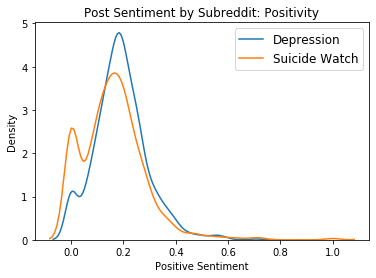

In [10]:
sns.distplot(df_d_p['P_Sent_Pos'], hist = False, kde = True, label='Depression')
sns.distplot(df_s_p['P_Sent_Pos'], hist = False, kde = True, label='Suicide Watch')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Post Sentiment by Subreddit: Positivity')
plt.xlabel('Positive Sentiment')
plt.ylabel('Density')  

Text(0, 0.5, 'Density')

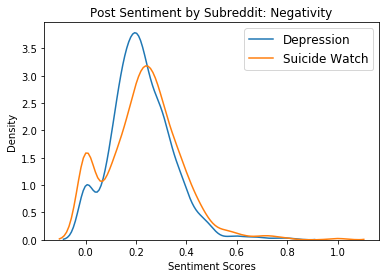

In [11]:
sns.distplot(df_d_p['P_Sent_Neg'], hist = False, kde = True, label='Depression')
sns.distplot(df_s_p['P_Sent_Neg'], hist = False, kde = True, label='Suicide Watch')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Post Sentiment by Subreddit: Negativity')
plt.xlabel('Sentiment Scores')
plt.ylabel('Density')  

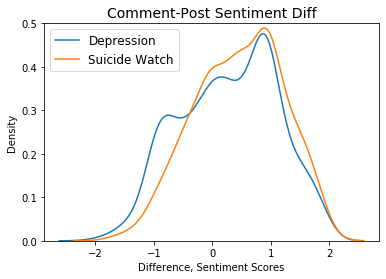

In [53]:
sns.distplot(df_d_p['Diff_Sent_Com'], hist = False, kde = True, label='Depression')
sns.distplot(df_s_p['Diff_Sent_Com'], hist = False, kde = True, label='Suicide Watch')
# Plot formatting
plt.legend(prop={'size': 12})
plt.xlabel('Difference, Sentiment Scores')
plt.ylabel('Density')
plt.title('Comment-Post Sentiment Diff', fontsize = 14)

plt.ylim(0, 0.5)

plt.savefig('Median_Comment_Sentiment_Minus_Post_Sentiment.png')

Text(0, 0.5, 'Density')

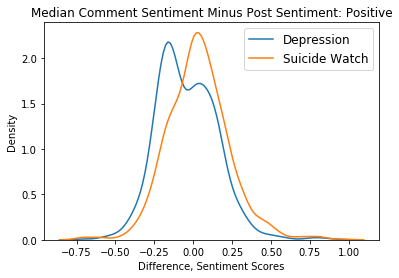

In [13]:


sns.distplot(df_d_p['Diff_Sent_Pos'], hist = False, kde = True, label='Depression')
sns.distplot(df_s_p['Diff_Sent_Pos'], hist = False, kde = True, label='Suicide Watch')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Median Comment Sentiment Minus Post Sentiment: Positive')
plt.xlabel('Difference, Sentiment Scores')
plt.ylabel('Density')  

Text(0, 0.5, 'Density')

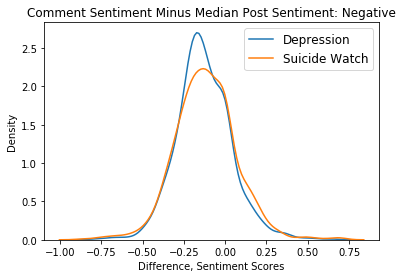

In [14]:
sns.distplot(df_d_p['Diff_Sent_Neg'], hist = False, kde = True, label='Depression')
sns.distplot(df_s_p['Diff_Sent_Neg'], hist = False, kde = True, label='Suicide Watch')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Comment Sentiment Minus Median Post Sentiment: Negative')
plt.xlabel('Difference, Sentiment Scores')
plt.ylabel('Density')  

Text(0, 0.5, 'Density')

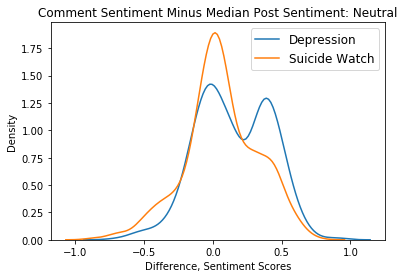

In [15]:
sns.distplot(df_d_p['Diff_Sent_Neu'], hist = False, kde = True, label='Depression')
sns.distplot(df_s_p['Diff_Sent_Neu'], hist = False, kde = True, label='Suicide Watch')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Comment Sentiment Minus Median Post Sentiment: Neutral')
plt.xlabel('Difference, Sentiment Scores')
plt.ylabel('Density')

### Sentiments, Post Replies Only

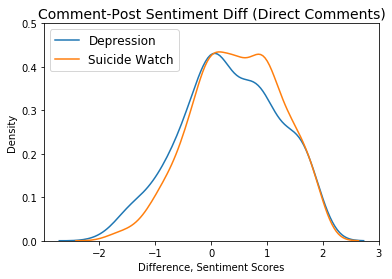

In [52]:
x = df_d_c[df_d_c['Post_Reply']=='Y']
y = df_s_c[df_s_c['Post_Reply']=='Y']

x = x.groupby('p_id')[['C_Sent_Com', 'P_Sent_Com', 'C_Sent_Pos', 'P_Sent_Pos', 'C_Sent_Neg', 'P_Sent_Neg']].median()
y = y.groupby('p_id')[['C_Sent_Com', 'P_Sent_Com', 'C_Sent_Pos', 'P_Sent_Pos', 'C_Sent_Neg', 'P_Sent_Neg']].median()

x['Diff_Sent_Com'] = x['C_Sent_Com'] - x['P_Sent_Com']
y['Diff_Sent_Com'] = y['C_Sent_Com'] - y['P_Sent_Com']

x['Diff_Sent_Pos'] = x['C_Sent_Pos'] - x['P_Sent_Pos']
y['Diff_Sent_Pos'] = y['C_Sent_Pos'] - y['P_Sent_Pos']

x['Diff_Sent_Neg'] = x['C_Sent_Neg'] - x['P_Sent_Neg']
y['Diff_Sent_Neg'] = y['C_Sent_Neg'] - y['P_Sent_Neg']

sns.distplot(x['Diff_Sent_Com'], hist = False, kde = True, label='Depression')
sns.distplot(y['Diff_Sent_Com'], hist = False, kde = True, label='Suicide Watch')

# Plot formatting
plt.legend(prop={'size': 12})
plt.xlabel('Difference, Sentiment Scores')
plt.ylabel('Density')
plt.title('Comment-Post Sentiment Diff (Direct Comments)', fontsize = 14)

plt.ylim(0, 0.5)

plt.savefig('Median_Direct_Comment_Sentiment_Minus_Post_Sentiment.png')

Text(0, 0.5, 'Density')

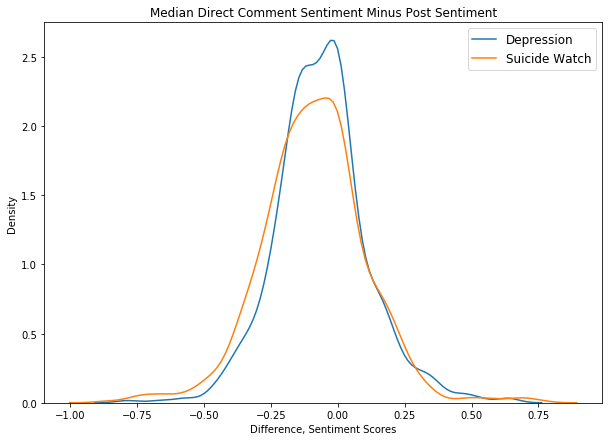

In [386]:
sns.distplot(x['Diff_Sent_Neg'], hist = False, kde = True, label='Depression')
sns.distplot(y['Diff_Sent_Neg'], hist = False, kde = True, label='Suicide Watch')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Median Direct Comment Sentiment Minus Post Sentiment')
plt.xlabel('Difference, Sentiment Scores')
plt.ylabel('Density')  

### Comment Length

count    934.000000
mean      29.740364
std       38.704528
min        1.000000
25%        1.000000
50%       17.000000
75%       43.875000
max      312.000000
Name: median_comment_length, dtype: float64
count    980.000000
mean      33.863265
std       42.484560
min        1.000000
25%        7.000000
50%       22.000000
75%       44.625000
max      444.000000
Name: median_comment_length, dtype: float64


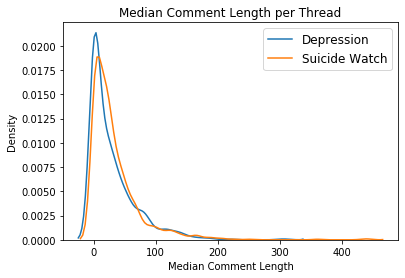

In [103]:
sns.distplot(df_d_p['median_comment_length'], hist = False, kde = True, label='Depression')
sns.distplot(df_s_p['median_comment_length'], hist = False, kde = True, label='Suicide Watch')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Median Comment Length per Thread')
plt.xlabel('Median Comment Length')
plt.ylabel('Density')  
plt.savefig('Median_Comment_Length_Per_Thread_Comparison.png')

print(df_d_p['median_comment_length'].describe())
print(df_s_p['median_comment_length'].describe())

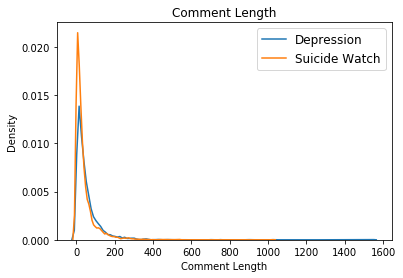

In [104]:
sns.distplot(df_d_c['comment_length'], hist = False, kde = True, label='Depression')
sns.distplot(df_s_c['comment_length'], hist = False, kde = True, label='Suicide Watch')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Comment Length')
plt.xlabel('Comment Length')
plt.ylabel('Density')  
plt.savefig('Comment_Length_Comparison.png')

### Correlations among sentiments

In [98]:
df_d_p[['C_Sent_Com', 'C_Sent_Pos', 'C_Sent_Neu', 'C_Sent_Neg', 
        'P_Sent_Com', 'P_Sent_Pos', 'P_Sent_Neu', 'P_Sent_Neg',
        'Diff_Sent_Com', 'Diff_Sent_Pos', 'Diff_Sent_Neu', 'Diff_Sent_Neg']].corr()

,C_Sent_Com,C_Sent_Pos,C_Sent_Neu,C_Sent_Neg,P_Sent_Com,P_Sent_Pos,P_Sent_Neu,P_Sent_Neg,Diff_Sent_Com,Diff_Sent_Pos,Diff_Sent_Neu,Diff_Sent_Neg
C_Sent_Com,1.000000,0.574726,-0.201377,-0.395162,0.052867,0.015707,0.027938,-0.043630,0.449622,0.480159,-0.188493,-0.257440
C_Sent_Pos,0.574726,1.000000,-0.820909,0.202234,0.034186,0.006532,0.012482,-0.019025,0.255009,0.846528,-0.717762,0.161972
C_Sent_Neu,-0.201377,-0.820909,1.000000,-0.656195,0.007351,0.014857,0.000579,-0.013177,-0.106642,-0.705686,0.866470,-0.470813
C_Sent_Neg,-0.395162,0.202234,-0.656195,1.000000,-0.078782,-0.051348,-0.020550,0.065502,-0.125892,0.199236,-0.558503,0.684297
P_Sent_Com,0.052867,0.034186,0.007351,-0.078782,1.000000,0.596817,0.135422,-0.648034,-0.868200,-0.288661,-0.061235,0.415884
P_Sent_Pos,0.015707,0.006532,0.014857,-0.051348,0.596817,1.000000,-0.493468,-0.294105,-0.526030,-0.526803,0.259231,0.177329
P_Sent_Neu,0.027938,0.012482,0.000579,-0.020550,0.135422,-0.493468,1.000000,-0.686159,-0.107249,0.273310,-0.498727,0.486381
P_Sent_Neg,-0.043630,-0.019025,-0.013177,0.065502,-0.648034,-0.294105,-0.686159,1.000000,0.557967,0.140397,0.331129,-0.682815
Diff_Sent_Com,0.449622,0.255009,-0.106642,-0.125892,-0.868200,-0.526030,-0.107249,0.557967,1.000000,0.496794,-0.038891,-0.499920
Diff_Sent_Pos,0.480159,0.846528,-0.705686,0.199236,-0.288661,-0.526803,0.273310,0.140397,0.496794,1.000000,-0.748104,0.043275


In [23]:
df_s_p[['C_Sent_Com', 'C_Sent_Pos', 'C_Sent_Neu', 'C_Sent_Neg', 
        'P_Sent_Com', 'P_Sent_Pos', 'P_Sent_Neu', 'P_Sent_Neg',
        'Diff_Sent_Com', 'Diff_Sent_Pos', 'Diff_Sent_Neu', 'Diff_Sent_Neg']].corr()


,C_Sent_Com,C_Sent_Pos,C_Sent_Neu,C_Sent_Neg,P_Sent_Com,P_Sent_Pos,P_Sent_Neu,P_Sent_Neg,Diff_Sent_Com,Diff_Sent_Pos,Diff_Sent_Neu,Diff_Sent_Neg
C_Sent_Com,1.000000,0.591207,-0.156213,-0.516316,0.117231,0.076583,0.014318,-0.091179,0.477680,0.459932,-0.133156,-0.284288
C_Sent_Pos,0.591207,1.000000,-0.765021,-0.027884,0.084216,0.102168,-0.042987,-0.042703,0.269220,0.794656,-0.580500,0.014317
C_Sent_Neu,-0.156213,-0.765021,1.000000,-0.538338,-0.019820,-0.042606,0.031613,0.002784,-0.073287,-0.629627,0.774361,-0.373264
C_Sent_Neg,-0.516316,-0.027884,-0.538338,1.000000,-0.111620,-0.038649,-0.034909,0.084927,-0.201436,-0.000311,-0.405543,0.622603
P_Sent_Com,0.117231,0.084216,-0.019820,-0.111620,1.000000,0.490808,0.194978,-0.642578,-0.816477,-0.227344,-0.139177,0.427725
P_Sent_Pos,0.076583,0.102168,-0.042606,-0.038649,0.490808,1.000000,-0.512328,-0.220976,-0.389661,-0.522694,0.290490,0.146908
P_Sent_Neu,0.014318,-0.042987,0.031613,-0.034909,0.194978,-0.512328,1.000000,-0.683870,-0.164160,0.275810,-0.607948,0.513032
P_Sent_Neg,-0.091179,-0.042703,0.002784,0.084927,-0.642578,-0.220976,-0.683870,1.000000,0.515437,0.098255,0.435143,-0.726835
Diff_Sent_Com,0.477680,0.269220,-0.073287,-0.201436,-0.816477,-0.389661,-0.164160,0.515437,1.000000,0.468515,0.045706,-0.543662
Diff_Sent_Pos,0.459932,0.794656,-0.629627,-0.000311,-0.227344,-0.522694,0.275810,0.098255,0.468515,1.000000,-0.674763,-0.077381


In [24]:
df_s_p[['P_Neg_Feelings', 'P_Suicide_Act', 'P_Goal', 'P_Medical']].corr()

,P_Neg_Feelings,P_Suicide_Act,P_Goal,P_Medical
P_Neg_Feelings,1.000000,0.786383,0.735439,0.820065
P_Suicide_Act,0.786383,1.000000,0.730543,0.905130
P_Goal,0.735439,0.730543,1.000000,0.761219
P_Medical,0.820065,0.905130,0.761219,1.000000


In [25]:
df_d_p[['P_Neg_Feelings', 'P_Suicide_Act', 'P_Goal', 'P_Medical']].corr()

,P_Neg_Feelings,P_Suicide_Act,P_Goal,P_Medical
P_Neg_Feelings,1.000000,0.784947,0.788240,0.757139
P_Suicide_Act,0.784947,1.000000,0.895876,0.903457
P_Goal,0.788240,0.895876,1.000000,0.856556
P_Medical,0.757139,0.903457,0.856556,1.000000


### MDS Plots - Medical Intervention and Suicide

In [55]:
words = ['die', 'knife', 'pill', 'hang', 'cut', 'suicide', 'antidepressant', 'gun', 
         'therapist', 'psychiatrist']

for i in words:
    df_d_c[i] = 0
    df_s_c[i] = 0

df_d_c['comment_sw_p'] = df_d_c['comment_sw_p'].astype(str)
df_s_c['comment_sw_p'] = df_s_c['comment_sw_p'].astype(str)
    
names = list(df_d_c.columns.values)
for i in range(len(df_d_c)):
    for j in range(42, len(names)):
        if(names[j] in df_d_c['comment_sw_p'].iloc[i]):
            df_d_c.iloc[i,j] = 1

names = list(df_s_c.columns.values)
for i in range(len(df_s_c)):
    for j in range(42, len(names)):
        if(names[j] in df_s_c['comment_sw_p'].iloc[i]):
            df_s_c.iloc[i,j] = 1


In [56]:
df_Hold = df_d_c[words]

df_Lift_d = pd.DataFrame(columns=[words], index=words)
n = len(df_d_c)

for i in range(len(df_Lift_d)):
    for j in range(len(words)):
        u = len(df_Hold[df_Hold[df_Hold.columns[i]]+df_Hold[df_Hold.columns[j]]==2])
        a = df_Hold[df_Hold.columns[i]].sum()
        b = df_Hold[df_Hold.columns[j]].sum()

        if(a==0 or b==0):
            df_Lift_d.iloc[i,j] = 1
        else:  
            df_Lift_d.iloc[i,j] = n*u/a/b
df_Lift_d = df_Lift_d.replace(0, 1)
df_Lift_d

,die,knife,pill,hang,cut,suicide,antidepressant,gun,therapist,psychiatrist
die,1,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
knife,1,1008.75000,1.000000,1.000000,25.218750,1.000000,1.000000,1.000000,1.000000,1.000000
pill,1,1.00000,310.384615,1.599921,7.759615,3.410820,11.937870,1.000000,1.000000,17.243590
hang,1,1.00000,1.599921,20.798969,1.559923,1.828481,1.599921,2.079897,1.871907,1.733247
cut,1,25.21875,7.759615,1.559923,100.875000,2.217033,1.000000,1.000000,3.026250,1.000000
suicide,1,1.00000,3.410820,1.828481,2.217033,44.340659,3.410820,4.434066,2.217033,2.463370
antidepressant,1,1.00000,11.937870,1.599921,1.000000,3.410820,155.192308,1.000000,3.103846,12.932692
gun,1,1.00000,1.000000,2.079897,1.000000,4.434066,1.000000,403.500000,4.035000,1.000000
therapist,1,1.00000,1.000000,1.871907,3.026250,2.217033,3.103846,4.035000,40.350000,8.966667
psychiatrist,1,1.00000,17.243590,1.733247,1.000000,2.463370,12.932692,1.000000,8.966667,112.083333


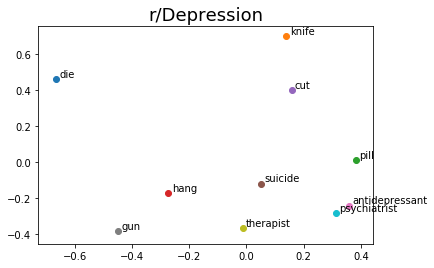

In [96]:
df_Dissimilarity = df_Lift_d.copy(deep=True)

for i in range(len(df_Dissimilarity)):
    for j in range(len(df_Dissimilarity)):
            df_Dissimilarity.iloc[i,j] = 1/df_Lift_d.iloc[i,j]

            
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity="precomputed")

pos = mds.fit_transform(df_Dissimilarity)


xs, ys = pos[:, 0],pos[:, 1]
names = words

for x, y, name in zip(xs, ys, names):
    plt.scatter(x, y)
    plt.text(x+0.012, y+0.012, name, fontsize = 10)


plt.title('r/Depression', fontsize = 18)

plt.savefig('Suicide_Words_and_Medical_Intervention_Depression.png')
plt.show()

In [97]:
df_Hold = df_s_c[words]

df_Lift_s = pd.DataFrame(columns=[words], index=words)
n = len(df_s_c)

for i in range(len(df_Lift_s)):
    for j in range(len(words)):
        u = len(df_Hold[df_Hold[df_Hold.columns[i]]+df_Hold[df_Hold.columns[j]]==2])
        a = df_Hold[df_Hold.columns[i]].sum()
        b = df_Hold[df_Hold.columns[j]].sum()

        if(a==0 or b==0):
            df_Lift_s.iloc[i,j] = 1
        else:  
            df_Lift_s.iloc[i,j] = n*u/a/b
df_Lift_s = df_Lift_s.replace(0, 1)
df_Lift_s

,die,knife,pill,hang,cut,suicide,antidepressant,gun,therapist,psychiatrist
die,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
knife,1,494.111111,9.322851,1.000000,15.939068,2.642305,1.000000,1.000000,1.000000,1.000000
pill,1,9.322851,83.905660,2.162517,8.119903,2.692160,14.806881,2.996631,2.996631,1.000000
hang,1,1.000000,2.162517,22.922680,4.436648,2.451624,5.393572,3.274669,2.046668,1.146134
cut,1,15.939068,8.119903,4.436648,143.451613,2.301363,1.000000,10.246544,1.000000,7.172581
suicide,1,2.642305,2.692160,2.451624,2.301363,23.780749,1.398868,4.246562,2.123281,2.378075
antidepressant,1,1.000000,14.806881,5.393572,1.000000,1.398868,261.588235,9.342437,14.013655,26.158824
gun,1,1.000000,2.996631,3.274669,10.246544,4.246562,9.342437,158.821429,1.000000,1.000000
therapist,1,1.000000,2.996631,2.046668,1.000000,2.123281,14.013655,1.000000,79.410714,3.970536
psychiatrist,1,1.000000,1.000000,1.146134,7.172581,2.378075,26.158824,1.000000,3.970536,222.350000


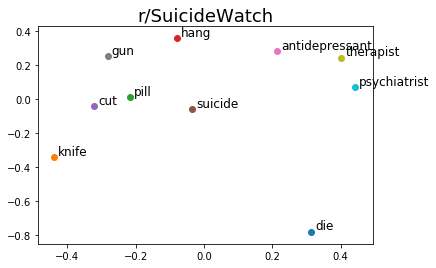

In [104]:
df_Dissimilarity = df_Lift_s.copy(deep=True)

for i in range(len(df_Dissimilarity)):
    for j in range(len(df_Dissimilarity)):
            df_Dissimilarity.iloc[i,j] = 1/df_Lift_s.iloc[i,j]


mds = MDS(n_components=2, dissimilarity="precomputed")
pos = mds.fit_transform(df_Dissimilarity)


xs, ys = pos[:, 0],pos[:, 1]
names = words

for x, y, name in zip(xs, ys, names):
    plt.scatter(x, y)
    plt.text(x+.012, y+.012, name, fontsize = 12)

plt.title('r/SuicideWatch', fontsize=18)


plt.savefig('Suicide_Words_and_Medical_Intervention_SuicideWatch.png')
plt.show()